In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

data_path = 'archive/'

In [2]:
import random

positive_file_path = data_path + 'positive_Covid-19/'
positive_file_list = os.listdir(positive_file_path)
random.shuffle(positive_file_list)

negative_file_path = data_path + 'negative_Covid-19/'
negative_file_list = os.listdir(negative_file_path)
random.shuffle(negative_file_list)

In [3]:
# 사진 하나를 받아서 전처리 해준 후 반환해줌
def get_preprocessed_image(img_path):
    img = cv2.imread(img_path)
    
# crop image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thr = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

    contours, hier = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for c in contours:
        if cv2.contourArea(c) > 0.2 * 432 * 288:
            rect = cv2.minAreaRect(c)
            pts1 = cv2.boxPoints(rect)
            pts2 = np.float32([[0, 400], [0, 0], [400, 0], [400, 400]])
            
            M = cv2.getPerspectiveTransform(pts1, pts2)
            dst = cv2.warpPerspective(img, M, (400,400))
            
#             box = np.int0(pts1)
#             cv2.drawContours(img, [box], -1, (255, 0, 0), 3)
#             plt.imshow(img)

# rotate image
            left = np.sum(dst[:,:50])
            right = np.sum(dst[:,350:])
            top = np.sum(dst[:50,:])
            bottom = np.sum(dst[350:,:])
            
#             print(top)
#             print(bottom)
#             print(left)
#             print(right)
            
            sum_min = min(left, right, top, bottom)
        
            if sum_min == left:
                dst = cv2.rotate(dst, cv2.ROTATE_90_COUNTERCLOCKWISE)
            elif sum_min == right:
                dst = cv2.rotate(dst, cv2.ROTATE_90_CLOCKWISE)
            elif sum_min == top:
                dst = cv2.rotate(dst, cv2.ROTATE_180)
            elif sum_min == bottom:
                pass

            return dst

archive/negative_Covid-19/negative_0_2734.jpg
archive/negative_Covid-19/negative_0_1719.jpg
archive/negative_Covid-19/negative_0_4316.jpg
archive/negative_Covid-19/negative_0_8244.jpg
archive/negative_Covid-19/negative_0_5092.jpg
archive/negative_Covid-19/negative_0_6709.jpg
archive/negative_Covid-19/negative_0_2436.jpg
archive/negative_Covid-19/negative_0_8376.jpg
archive/negative_Covid-19/negative_0_1513.jpg


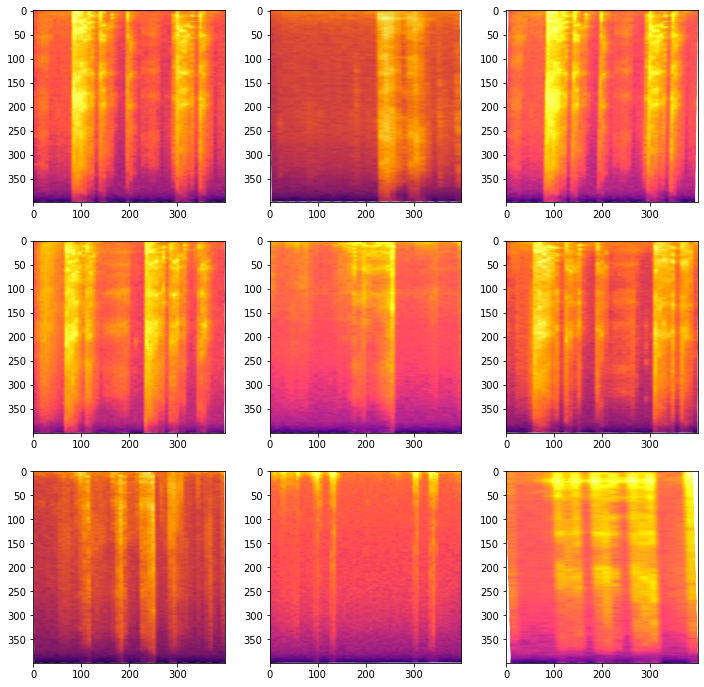

In [4]:
# 전처리 샘플 출력
plt.figure(figsize=(12, 12))
for i in range(3):
    for j in range(3):
        print(negative_file_path + negative_file_list[i * 3 + j])
        img = get_preprocessed_image(negative_file_path + negative_file_list[i * 3 + j])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(330 + (i * 3 + j + 1))
        plt.imshow(img)

In [5]:
# preprocessed_image 폴더 초기화

import shutil
import os

save_path = "preprocessed_data/"
 
try:
    if os.path.isdir(save_path):
        shutil.rmtree(save_path)
        print("remove directory")
        
    os.makedirs(save_path + "train/positive/")
    os.makedirs(save_path + "train/negative/")
    os.makedirs(save_path + "test/positive/")
    os.makedirs(save_path + "test/negative/")
    print("make new directory")
    
except OSError as e:
    print(e)
    raise

remove directory
make new directory


In [6]:
# 모든 이미지 전처리하여 preprocessed_data/ 폴더에 저장

for image_name in positive_file_list[:int(len(positive_file_list) * 0.8)]:
    img = get_preprocessed_image(positive_file_path + image_name)
    cv2.imwrite(save_path + "train/positive/" + image_name, img)
    
for image_name in negative_file_list[:int(len(negative_file_list) * 0.8)]:
    img = get_preprocessed_image(negative_file_path + image_name)
    cv2.imwrite(save_path + "train/negative/A" + image_name, img)    
for image_name in negative_file_list[:int(len(negative_file_list) * 0.8)]:
    img = get_preprocessed_image(negative_file_path + image_name)
    cv2.imwrite(save_path + "train/negative/B" + image_name, img)    
for image_name in negative_file_list[:int(len(negative_file_list) * 0.8)]:
    img = get_preprocessed_image(negative_file_path + image_name)
    cv2.imwrite(save_path + "train/negative/C" + image_name, img)    
for image_name in negative_file_list[:int(len(negative_file_list) * 0.8)]:
    img = get_preprocessed_image(negative_file_path + image_name)
    cv2.imwrite(save_path + "train/negative/D" + image_name, img)    
for image_name in negative_file_list[:int(len(negative_file_list) * 0.8)]:
    img = get_preprocessed_image(negative_file_path + image_name)
    cv2.imwrite(save_path + "train/negative/E" + image_name, img)

for image_name in positive_file_list[:int(len(positive_file_list) * 0.2)]:
    img = get_preprocessed_image(positive_file_path + image_name)
    cv2.imwrite(save_path + "test/positive/" + image_name, img)
    
for image_name in negative_file_list[:int(len(negative_file_list) * 0.2)]:
    img = get_preprocessed_image(negative_file_path + image_name)
    cv2.imwrite(save_path + "test/negative/A" + image_name, img)
for image_name in negative_file_list[:int(len(negative_file_list) * 0.2)]:
    img = get_preprocessed_image(negative_file_path + image_name)
    cv2.imwrite(save_path + "test/negative/B" + image_name, img)
for image_name in negative_file_list[:int(len(negative_file_list) * 0.2)]:
    img = get_preprocessed_image(negative_file_path + image_name)
    cv2.imwrite(save_path + "test/negative/C" + image_name, img)
for image_name in negative_file_list[:int(len(negative_file_list) * 0.2)]:
    img = get_preprocessed_image(negative_file_path + image_name)
    cv2.imwrite(save_path + "test/negative/D" + image_name, img)
for image_name in negative_file_list[:int(len(negative_file_list) * 0.2)]:
    img = get_preprocessed_image(negative_file_path + image_name)
    cv2.imwrite(save_path + "test/negative/E" + image_name, img)

preprocessed_data/train/positive/positive_0_5778.jpg
preprocessed_data/train/positive/positive_0_3531.jpg
preprocessed_data/train/positive/positive_0_9727.jpg
preprocessed_data/train/positive/positive_0_663.jpg
preprocessed_data/train/positive/positive_0_2435.jpg
preprocessed_data/train/positive/positive_0_2809.jpg
preprocessed_data/train/positive/positive_0_5798.jpg
preprocessed_data/train/positive/positive_0_4137.jpg
preprocessed_data/train/positive/positive_0_3323.jpg


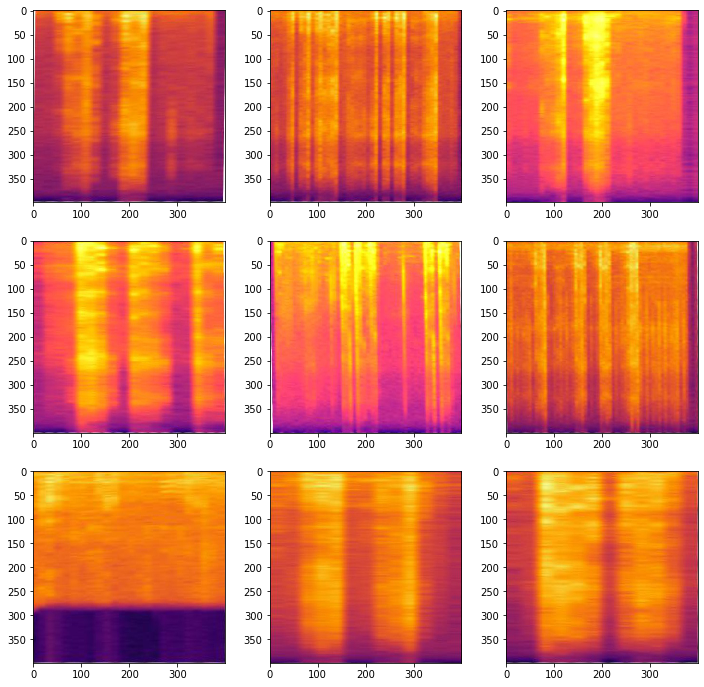

In [7]:
# 전처리, 저장된 파일들 확인

sample_file_path = save_path + "train/positive/"
sample_file_list = os.listdir(sample_file_path)

plt.figure(figsize=(12, 12))
for i in range(3):
    for j in range(3):
        print(sample_file_path + sample_file_list[i * 3 + j])
        img = cv2.imread(sample_file_path + sample_file_list[i * 3 + j])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(330 + (i * 3 + j + 1))
        plt.imshow(img)